In [44]:
import requests
import pandas as pd
from pandas import DataFrame
from collections import Counter
from itertools import islice
import matplotlib.pyplot as plt


In [45]:
#Feature 1: Connect to an external/3rd party API and read data into your app.
ds = requests.get('https://api.spacexdata.com/v3/launches')
all_launches = ds.json()

In [46]:
#make api data readable
launch_summary = []

i = 0 
for launch in all_launches:
    data =  flight_number, mission_name, rocket_name, rocket_type, launch_year, payload, orbit, land_success, launch_success= all_launches[i]['flight_number'],\
            all_launches[i]['mission_name'],\
            all_launches[i]['rocket']['rocket_name'],\
            all_launches[i]['rocket']['rocket_type'],\
            all_launches[i]['launch_year'],\
            all_launches[i]['rocket']['second_stage']['payloads'][0]['payload_type'],\
            all_launches[i]['rocket']['second_stage']['payloads'][0]['orbit'],\
            all_launches[i]['rocket']['first_stage']['cores'][0]['land_success'],\
            all_launches[i]['launch_success']

    launch_summary.append(data)
    i += 1

df = DataFrame(data = launch_summary, columns =["Flight Number",\
                                                "Mission Name",\
                                                "Rocket Name",\
                                                "Engine",\
                                                "Launch Year",\
                                                "Payload",\
                                                "Orbit",\
                                                "Landing Success",\
                                                "Mission Success"])
df


,Flight Number,Mission Name,Rocket Name,Engine,Launch Year,Payload,Orbit,Landing Success,Mission Success
0,1,FalconSat,Falcon 1,Merlin A,2006,Satellite,LEO,None,False
1,2,DemoSat,Falcon 1,Merlin A,2007,Satellite,LEO,None,False
2,3,Trailblazer,Falcon 1,Merlin C,2008,Satellite,LEO,None,False
3,4,RatSat,Falcon 1,Merlin C,2008,Satellite,LEO,None,True
4,5,RazakSat,Falcon 1,Merlin C,2009,Satellite,LEO,None,True
...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,Falcon 9,FT,2020,Crew Dragon,ISS,True,True
107,108,Sentinel-6 Michael Freilich,Falcon 9,FT,2020,Satellite,PO,True,True
108,109,Starlink-15 (v1.0),Falcon 9,FT,2020,Satellite,VLEO,True,True
109,110,CRS-21,Falcon 9,FT,2020,Dragon 2.0,ISS,None,None


In [47]:
df.to_csv('spacex_data.csv')
df

,Flight Number,Mission Name,Rocket Name,Engine,Launch Year,Payload,Orbit,Landing Success,Mission Success
0,1,FalconSat,Falcon 1,Merlin A,2006,Satellite,LEO,None,False
1,2,DemoSat,Falcon 1,Merlin A,2007,Satellite,LEO,None,False
2,3,Trailblazer,Falcon 1,Merlin C,2008,Satellite,LEO,None,False
3,4,RatSat,Falcon 1,Merlin C,2008,Satellite,LEO,None,True
4,5,RazakSat,Falcon 1,Merlin C,2009,Satellite,LEO,None,True
...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,Falcon 9,FT,2020,Crew Dragon,ISS,True,True
107,108,Sentinel-6 Michael Freilich,Falcon 9,FT,2020,Satellite,PO,True,True
108,109,Starlink-15 (v1.0),Falcon 9,FT,2020,Satellite,VLEO,True,True
109,110,CRS-21,Falcon 9,FT,2020,Dragon 2.0,ISS,None,None


In [48]:
df.to_csv('spacex_data.csv', index=False)
df

,Flight Number,Mission Name,Rocket Name,Engine,Launch Year,Payload,Orbit,Landing Success,Mission Success
0,1,FalconSat,Falcon 1,Merlin A,2006,Satellite,LEO,None,False
1,2,DemoSat,Falcon 1,Merlin A,2007,Satellite,LEO,None,False
2,3,Trailblazer,Falcon 1,Merlin C,2008,Satellite,LEO,None,False
3,4,RatSat,Falcon 1,Merlin C,2008,Satellite,LEO,None,True
4,5,RazakSat,Falcon 1,Merlin C,2009,Satellite,LEO,None,True
...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,Falcon 9,FT,2020,Crew Dragon,ISS,True,True
107,108,Sentinel-6 Michael Freilich,Falcon 9,FT,2020,Satellite,PO,True,True
108,109,Starlink-15 (v1.0),Falcon 9,FT,2020,Satellite,VLEO,True,True
109,110,CRS-21,Falcon 9,FT,2020,Dragon 2.0,ISS,None,None


In [30]:
#Feature 2: Read data from an external file, such as text, JSON, CSV, etc and use that data in your application.
df = pd.read_csv('spacex_data.csv')

In [49]:
#Count column 8 and different launches and print out results
successful_launches = []

def launches(data_set):
    launch_attempts = Counter(data_set)
    attempt_tally = {str(key): str(value) for key, value in islice(launch_attempts.items(), 3)}
    print("There were {} Unsuccessful launches out of the {} launches scheduled: ".format(launch_attempts[False], len(all_launches)))
    print("There were {} Successful launches out of the {} launches scheduled: ".format(launch_attempts[True], len(all_launches)))
    print("There are {} launches out of the {} launches scheduled, not yet attempted: ".format(launch_attempts[None], len(all_launches)))

i=0
for launch in all_launches:
    successful_launches.append(launch_summary[i][8
                                                ])
    i+=1
    
launches(successful_launches)


There were 5 Unsuccessful launches out of the 111 launches scheduled: 
There were 103 Successful launches out of the 111 launches scheduled: 
There are 3 launches out of the 111 launches scheduled, not yet attempted: 


<AxesSubplot:ylabel='Launch Summary'>

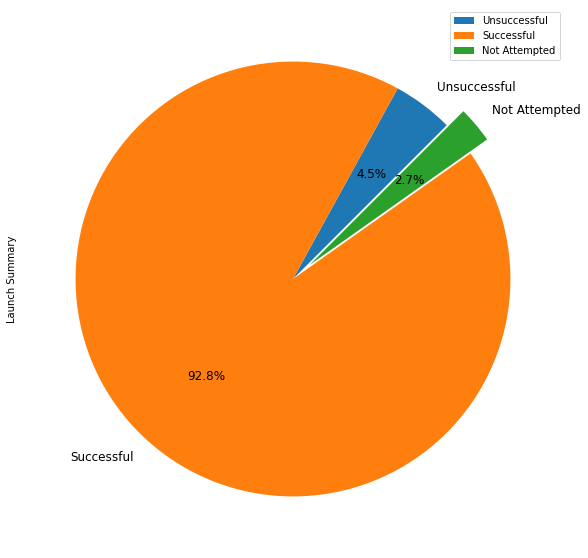

In [53]:
#Feature#3: Visualize data in a graph, chart, or other visual representation of data.

launches_pie = pd.Series(Counter(successful_launches), name='Launch Summary')
explode = (0, 0, 0.1)  
launches_pie.plot.pie(explode=explode, labels=('Unsuccessful', 'Successful', 'Not Attempted'), legend=True, fontsize=12, figsize=(10, 10), autopct='%1.1f%%', startangle=45)
